In [2]:
#setting up project development project environment and importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# opening and reading CSV file....defining data
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

data = pd.read_csv(dataset_url)


In [4]:
# printing first five columns
data.head()


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
#defining df and dataframe data
df = pd.DataFrame(data)

In [6]:
# listing columns
df.columns
# dataset columns are not labelled but ordered in following manner: 
  # sepal-length, sepal-width, petal-length, petal - width

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [7]:
#dropping Iris-Setosa column (class)
y = data['Iris-setosa'].values
X = data.drop('Iris-setosa', axis=1)

In [8]:
# dong 80/20 train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 , random_state = 7)

In [9]:
# creating multi_class Logistic Regression model
from sklearn.linear_model import LogisticRegression
MLR = LogisticRegression(solver='liblinear', multi_class='ovr')
MLR.fit(X_train,y_train)
y_pred1 = MLR.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred1))

0.9


In [10]:
#creating KNeighbors classifier model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors =5, p = 2, metric = 'minkowski')
KNC.fit(X_train, y_train)
KNC.score(X_test, y_test)

0.9333333333333333

In [11]:
#creating Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC.score(X_test, y_test)


0.9333333333333333

In [12]:
#creating Random forest classifier model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators =100)
RFC.fit(X_train, y_train)
y_pred3 = RFC.predict(X_test)
metrics.accuracy_score(y_test, y_pred3)

0.9666666666666667

In [13]:
#creating Support Vector Machines model
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', random_state = 7, gamma = 0.10, C = 1.0)
SVM.fit(X_train, y_train)
SVM.score(X_test, y_test)


0.9333333333333333

In [14]:
#creating Gaussian Naive Bayes Classifier model
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred2 = GNB.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9666666666666667

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
# list of models 
#creating an array for accuracy and confusion_mat
accuracy = []
confusion_mat = []
#creating a list of models used for testing above
models = [DTC, KNC, SVM, RFC, GNB, MLR]

for model in models:
   
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    model.score(X_test, y_test)
    accuracy.append(accuracy_score(y_test, prediction))
    print (accuracy_score(y_test, prediction))
    
    print(confusion_matrix(y_test, prediction))
    confusion_mat.append(confusion_matrix(y_test,prediction))
 # printing confusion matrix for each model type 
print (confusion_mat)


0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
0.9333333333333333
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
0.9333333333333333
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
[array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]], dtype=int64), array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 10]], dtype=int64), array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 10]], dtype=int64), array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]], dtype=int64), array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]], dtype=int64), array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  1, 10]], dtype=int64)]


In [16]:
accuracy

[0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9]

<function matplotlib.pyplot.show(close=None, block=None)>

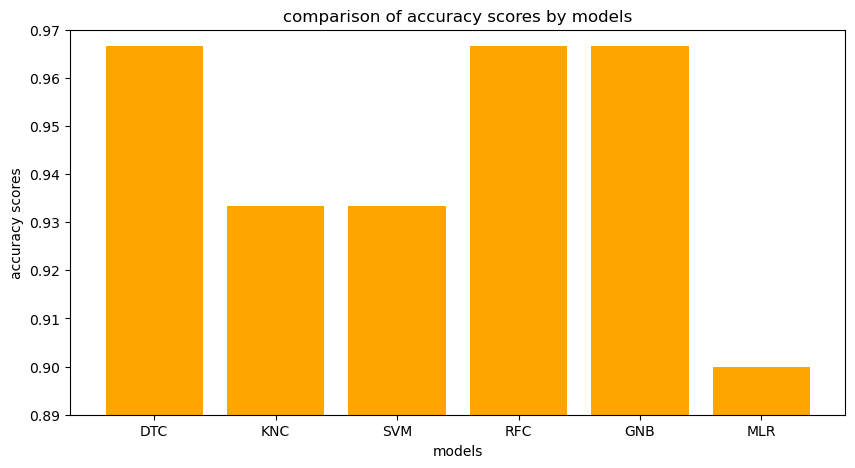

In [17]:
# plotting accuracy score for models tested above for comparison
models1 = ['DTC', 'KNC', 'SVM', 'RFC', 'GNB', 'MLR']

fig = plt.figure(figsize= (10,5))
plt.bar(models1, accuracy, color = 'orange')
plt.xlabel("models")
plt.ylabel("accuracy scores")
plt.title("comparison of accuracy scores by models")
plt.ylim(0.89,0.97)

plt.show




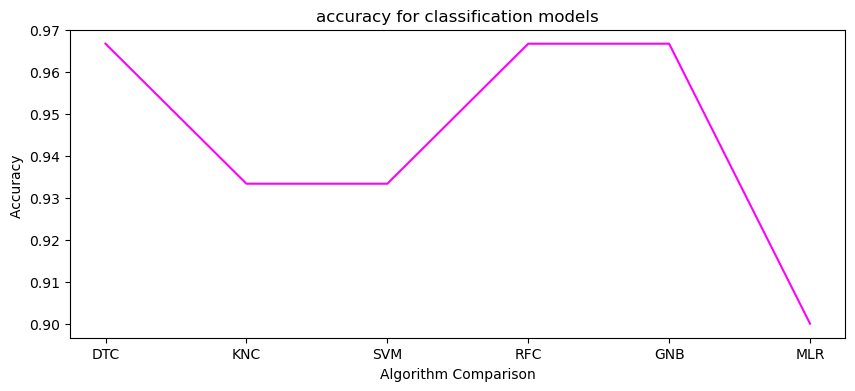

In [18]:
#algorithm comparison
plt.figure(figsize = (10,4))

plt.plot(["DTC", "KNC", "SVM", "RFC", "GNB", "MLR"], accuracy, color ="magenta" )
plt.title("accuracy for classification models")
plt.xlabel("Algorithm Comparison")
plt.ylabel("Accuracy ")

plt.show()